# Predicting Heart Disease using Machine Learning

we're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

# Preparing the tools:
we will use pandas, matplotlib, Numpy for data analysis and Manipulation

In [119]:
# Importing regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To make our plots appear inside the notebook
%matplotlib inline

# Models from SciKit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

In [11]:
## Load Data
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [14]:
# Data Exploration (EDA or Exploratory Data Analysis)

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

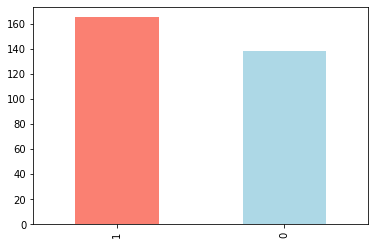

In [21]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "Lightblue"]);

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
# Checking if there is missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart Disease Frequenccy according to Sex 

In [28]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [30]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


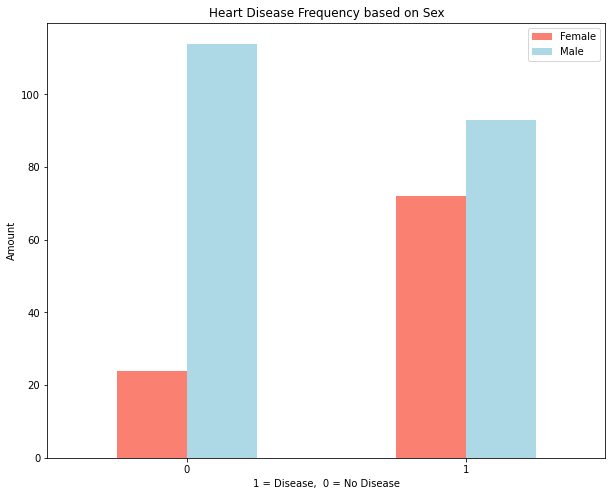

In [36]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,8),
                                    color=["Salmon", "lightblue"]);
plt.title("Heart Disease Frequency based on Sex")
plt.xlabel("1 = Disease,  0 = No Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

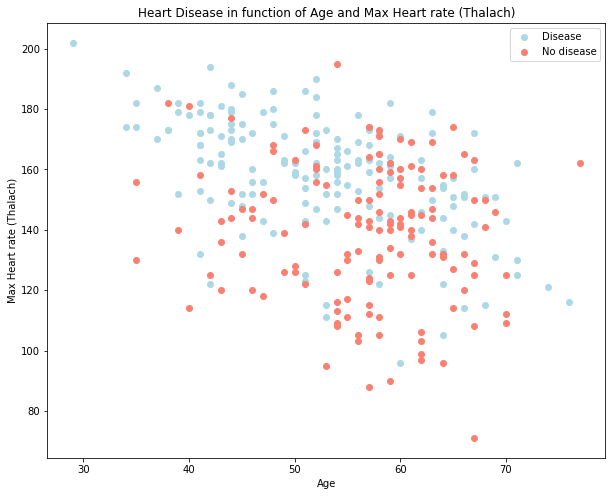

In [41]:
# Creating figure to visualize age and max heart rate with positive target
plt.figure(figsize=(10,8))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="Lightblue")

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="Salmon");

# Adding some helpful info
plt.title("Heart Disease in function of Age and Max Heart rate (Thalach)")
plt.xlabel("Age")
plt.ylabel("Max Heart rate (Thalach)")
plt.legend(["Disease", "No disease"]);

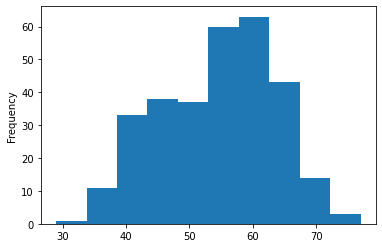

In [43]:
# Checking distribution of Age column with histogram
df.age.plot.hist();

In [45]:
# Heart Disease frequency per Chest Pain type

pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


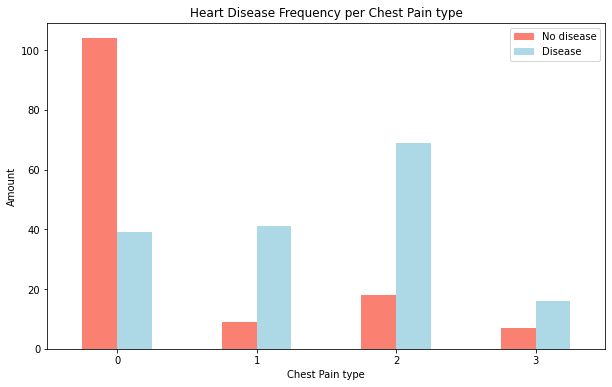

In [51]:
# Plotting the crosstab
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6),
                                   color=["Salmon", "lightblue"])
plt.title("Heart Disease Frequency per Chest Pain type")
plt.xticks(rotation=0)
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"]);

In [52]:
# Make a Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


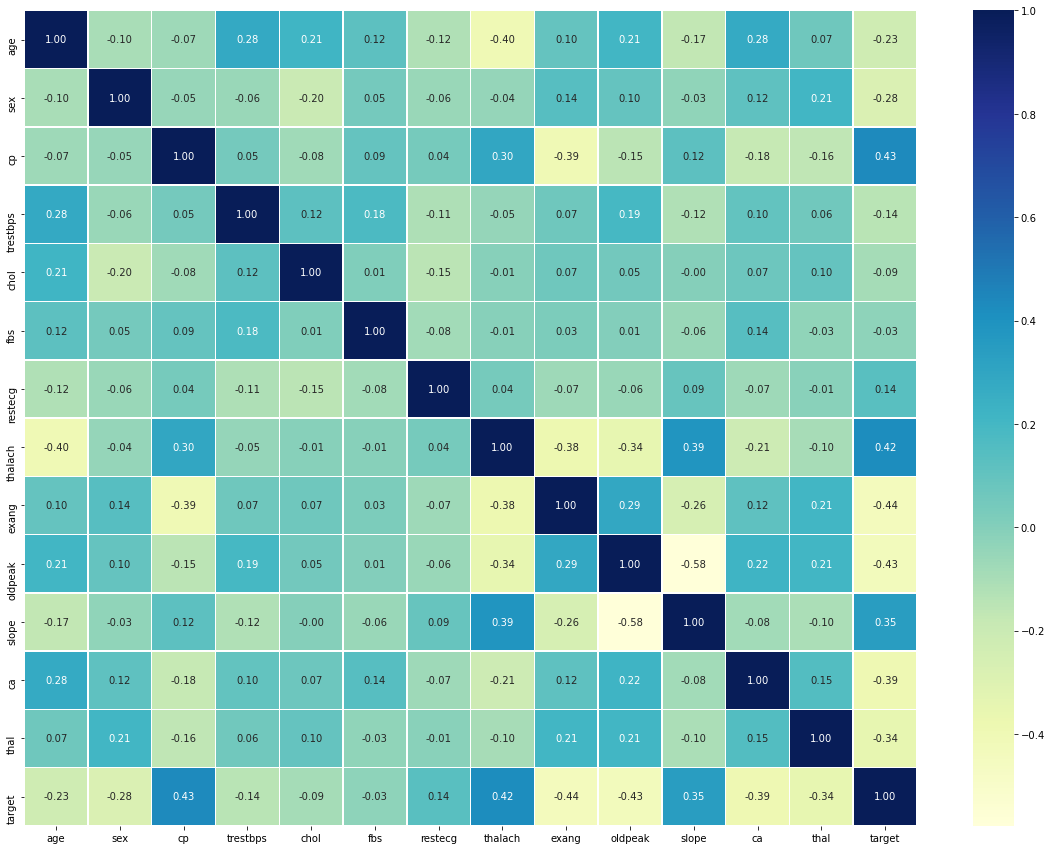

In [54]:
# Making the correlation matrix more prettier

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

# Modelling

In [56]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [57]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [58]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [59]:
# Split data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we've got our  data split into training and test sets, it's time to build a machine learning model

we're going to try 3 different ML models:
1. Logistic Regression
2. Random Forest Classifier
3. K-nearest Neighbours Classifier

In [80]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest Classifier": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and Evaluates given Machine Learning Models.
    models : a Dictionary of different Scikit Learn ML models.
    X_train : Training data (no labels).
    X_test : Testing data (no labels).
    y_train : Training labels.
    y_test : Testing labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the data and append to model_score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [81]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\akcho\OneDrive\Desktop\project\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

# Model Comparison

In [84]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest Classifier
Accuracy,0.885246,0.688525,0.836066


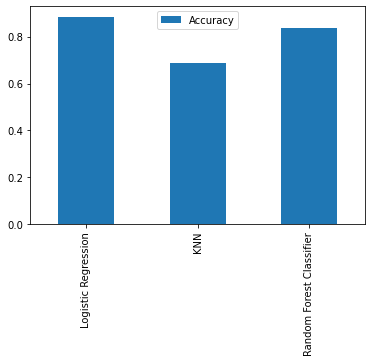

In [86]:
model_compare.T.plot.bar();

Now we've a baseline Model but we know a model's first predictions aren't always accurate. So, what should i do?

Let's look at the following:
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

# Hyperparameter Tuning (by hand)

In [89]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create  a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    #update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [90]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [91]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on test data is : 75.41 %


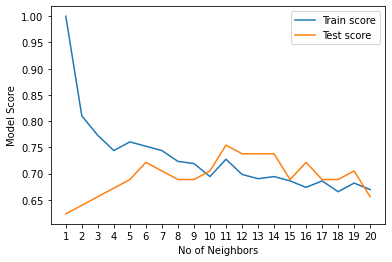

In [97]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("No of Neighbors")
plt.ylabel("Model Score")
plt.xticks(range(1,21,1))
plt.legend();
print(f"Maximum KNN score on test data is : {max(test_scores)*100:.2f} %")

# Hyperparameter tuning with RandomizedSearchCV

we're going to tune:
* Logistic Regression model
* Random Forest Classifier model

In [98]:
# create a gyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now tune Models with RandomizedSearchCV

**LogisticRegression with RandomizedSearchCV**

In [99]:
# Let's tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                               verbose=True)
# Fit random hyperparameter search model for logistic regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [100]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [101]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

**RandomForestClassifier with RandomizedSearchCV**

In [102]:
# setup random seed
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
rf = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

# Fit the model
rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [103]:
rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [104]:
# Evaluate the randomizedsearch random forest classifier
rf.score(X_test, y_test)

0.8688524590163934

# Hyperparameter tuning with GridSearchCV

In [105]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit the model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [106]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [111]:
print(f"{gs_log_reg.score(X_test, y_test)*100:.2f} %")

88.52 %


# Evaluating our tuned Machine learning Classifier, beyond accuracy


In [112]:
# First make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [113]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

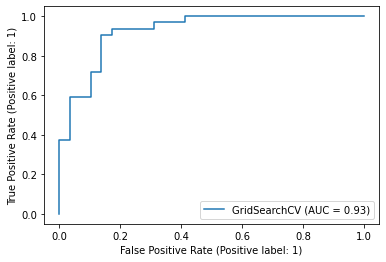

In [117]:
# plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);


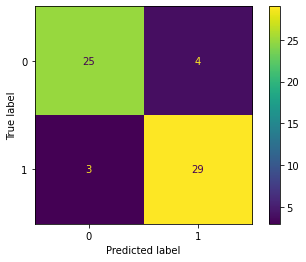

In [123]:
# Confusion metrics
plot_confusion_matrix(gs_log_reg, X_test, y_test);

Let's get a classification report as well as cross-validated precision, recall and f1-score

In [124]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculate Evaluation metrics using cross-validation

In [125]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [126]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [127]:
# Crossvalidated accuracy
cv_acc = cross_val_score(clf,
                X,
                y,
                cv=5,
                scoring="accuracy")
cv_acc.mean()

0.8446994535519124

In [128]:
# Crossvalidated precision
cv_pre = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_pre.mean()

0.8207936507936507

In [129]:
# Crossvalidated Recall 
cv_re = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
cv_re.mean()

0.9212121212121213

In [130]:
# Crossvalidated F1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1.mean()

0.8673007976269721

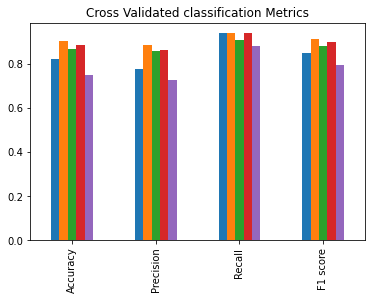

In [139]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_pre,
                           "Recall": cv_re,
                           "F1 score": cv_f1})
cv_metrics.T.plot.bar(title="Cross Validated classification Metrics",
                      legend=False);

In [143]:
cv_metrics

,Accuracy,Precision,Recall,F1 score
0,0.819672,0.775000,0.939394,0.849315
1,0.901639,0.885714,0.939394,0.911765
2,0.868852,0.857143,0.909091,0.882353
3,0.883333,0.861111,0.939394,0.898551
4,0.750000,0.725000,0.878788,0.794521


# Feature Importance

Finding feature importance is different for each machine learning model

In [145]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")
clf.fit(X_train, y_train);

In [146]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [147]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

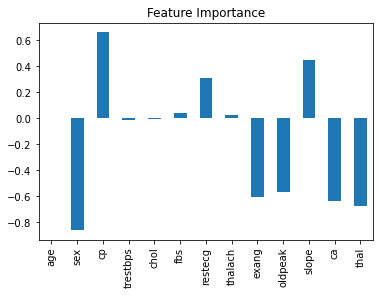

In [149]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

# 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself

* Could you collect more data?
* Could you try a better model like CatBoost or XGBoost?
* Could you improve the current models?

In [151]:
import joblib
from joblib import load, dump

In [154]:
dump(clf, filename="Classification-Model-1.joblib");